# Classification methods: Airbnb_Toronto_2017
You can find dataset at 
<br>
http://tomslee.net/airbnb-data-collection-get-the-data


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from random import randint
import sklearn


In [2]:
print (sklearn.__version__) #0.19.1


0.19.1


In [3]:
os.getcwd()
os.chdir('/Users/niloofarzarifi/Desktop/Udacity/khaneh/airbnb-Toronto/')

df1 = pd.read_csv('./2017/tomslee_airbnb_toronto_0778_2017-01-14.csv')
df2 = pd.read_csv('./2017/tomslee_airbnb_toronto_0857_2017-02-16.csv')
df3 = pd.read_csv('./2017/tomslee_airbnb_toronto_0930_2017-03-12.csv')
df4 = pd.read_csv('./2017/tomslee_airbnb_toronto_1042_2017-04-08.csv')

In [5]:
frames = [df1, df2, df3, df4]
result = pd.concat(frames)
result.shape

(50559, 14)

Here, check duplication, null values,drop columns

In [ ]:
DF = result[result.duplicated()]
result[result.duplicated(['host_id'])].count()
result[result.duplicated(['room_id'])].count()
result[result.duplicated(['last_modified'])].count()
result.duplicated(['room_id', 'host_id', 'room_type',
                   'neighborhood'])  # True or False

result.isnull().sum()  # drop two empty cols
result.columns.tolist()
result = result.drop(['borough', 'minstay', 'room_id', 'host_id',
                      'latitude', 'longitude', 'last_modified'], axis=1)

result.columns.tolist()

result.head()
result.overall_satisfaction.value_counts()
result.overall_satisfaction.nunique()  # target is 10 classes
result.room_type.value_counts()  # make dummy
result.neighborhood.value_counts()  # 139 neighborhood

In [6]:
data=pd.read_csv('./cleaned-airbnb.csv')
data.head() #145 columns


,reviews,overall_satisfaction,accommodates,bedrooms,price,room_type_Private room,room_type_Shared room,neighborhood_Agincourt South-Malvern West (128),neighborhood_Alderwood (20),neighborhood_Annex (95),...,neighborhood_Willowdale West (37),neighborhood_Willowridge-Martingrove-Richview (7),neighborhood_Woburn (137),neighborhood_Woodbine Corridor (64),neighborhood_Woodbine-Lumsden (60),neighborhood_Wychwood (94),neighborhood_Yonge-Eglinton (100),neighborhood_Yonge-St.Clair (97),neighborhood_York University Heights (27),neighborhood_Yorkdale-Glen Park (31)
0,0,0.0,4,1.0,392.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,4,1.0,77.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,2,1.0,157.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,5.0,2,1.0,71.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.0,2,1.0,78.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Update target
  * we must convert float to int in target column otherwise it gets continus error in classification 
  * example:cannot convert to object, err:unkown format in KNN model
  * old-class:0,1,1.5,2,2.5,3,3.5,4,4.5,5
  * new-class:0,2,3,4,5,6,7,8,9,10

In [7]:
y=data['overall_satisfaction']*2  
#int format converts 4.5, 3.5 that's why I changed it to 2,3,4,...10 
y=y.astype(int) 
y.dtypes
type(y)
y.value_counts()

0     21436
10    16552
9     10403
8      1633
7       378
6        91
5        56
4         4
2         4
3         2
Name: overall_satisfaction, dtype: int64

We are only interested to use z-score for price col
<br>
StandardScaler will change all dummies to continus number which decreases the accuracy score by 3%

In [8]:
X=data.drop(['overall_satisfaction'],axis=1)

X['price']= (data['price'] - data['price'].mean())/data['price'].std(ddof=0)


"""
#prefer to not use standardscalar
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
type(X_scaled)
"""

'\n#prefer to not use standardscalar\nfrom sklearn.preprocessing import StandardScaler\nsc=StandardScaler()\nX_scaled=sc.fit_transform(X)\ntype(X_scaled)\n'

In [9]:
FILTER_COL=X.columns.tolist()
len(FILTER_COL)

144

### RandomForest cross validation with 10 Kfold

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image
from sklearn import model_selection
#model.get_params()

### Optimize number of trees

In [11]:
Mean_result=[]
Full_result=[]
kfold = model_selection.KFold(n_splits=10, random_state=0)
#optimize number of trees
for num_trees in range(3,20):
    model = RandomForestClassifier(n_estimators=num_trees)
    results = model_selection.cross_val_score(model, X, y, cv=kfold)
    Mean_result.append(results.mean())
    Full_result.append(results)
    print("RandomForestClassifier, Cross_val_score=",results.mean() )

('RandomForestClassifier, Cross_val_score=', 0.89592354355256743)
('RandomForestClassifier, Cross_val_score=', 0.89790142686774588)
('RandomForestClassifier, Cross_val_score=', 0.90846335874995321)
('RandomForestClassifier, Cross_val_score=', 0.90937321191576215)
('RandomForestClassifier, Cross_val_score=', 0.91364535207652531)
('RandomForestClassifier, Cross_val_score=', 0.91342781226132774)
('RandomForestClassifier, Cross_val_score=', 0.91591991260689376)
('RandomForestClassifier, Cross_val_score=', 0.91890660409545644)
('RandomForestClassifier, Cross_val_score=', 0.92048892561569562)
('RandomForestClassifier, Cross_val_score=', 0.91866927014861832)
('RandomForestClassifier, Cross_val_score=', 0.9213789376979804)
('RandomForestClassifier, Cross_val_score=', 0.92046911583342728)
('RandomForestClassifier, Cross_val_score=', 0.92110204287646025)
('RandomForestClassifier, Cross_val_score=', 0.92128006876885882)
('RandomForestClassifier, Cross_val_score=', 0.92191299189923515)
('RandomFor

Text(0.5,1,'Mean of Cross validation scores with 10 Kfolds')

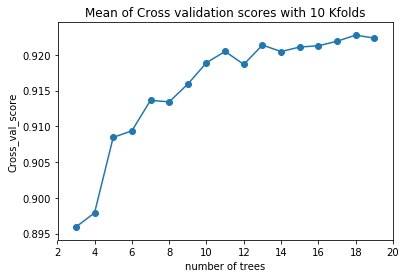

In [12]:
plt.plot(range(3,20),Mean_result)
plt.scatter(range(3,20),Mean_result)
plt.xlabel("number of trees")
plt.ylabel('Cross_val_score')
plt.title('Mean of Cross validation scores with 10 Kfolds')

here I show why we need average of result (results.mean()) and Full_result.append(results) is meaningless

Text(0.5,1,'Cross validation scores with 10 Kfolds')

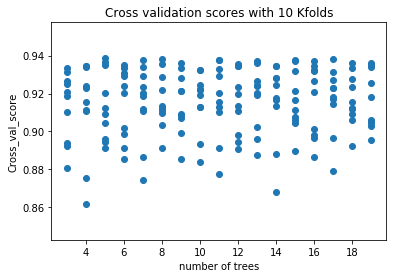

In [13]:
lt=[range(3,20)] * 10
plt.scatter(lt,Full_result)
plt.xlabel("number of trees")
plt.ylabel('Cross_val_score')
plt.title('Cross validation scores with 10 Kfolds')

### How to visualize a Decision Tree from a Random Forest in Python using Scikit-Learn
It shows how trees grow and what is the Max_depth for each branch
<br>
you could run this part in jupyter, since the image is big (35mb), I did not show it here

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y ,random_state=0)
model = RandomForestClassifier(n_estimators=10,max_depth=20) #max_depth=None takes forever

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[3] #we can change the tree number:) here I show #3

# Create DOT data
dot_data = tree.export_graphviz(estimator, out_file=None, 
                                feature_names=FILTER_COL,  
                                class_names=['0','2','3','4','5','6','7','8','9','10'],
                                rounded = True, proportion = False,
                                precision = 2, filled = True)
                                

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())


"\n#how about Max_depth?\n#How to Visualize a Decision Tree from a Random Forest in Python using Scikit-Learn\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y ,random_state=0)    \nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn import tree\nfrom sklearn.tree import DecisionTreeClassifier, export_graphviz\nimport pydotplus\nfrom IPython.display import Image\nmodel = RandomForestClassifier(n_estimators=10,max_depth=20) #max_depth=None takes forever\n\n# Train\nmodel.fit(X_train, y_train)\n# Extract single tree\nestimator = model.estimators_[3] #we can change the tree number:) here I show #3\n\n# Create DOT data\ndot_data = tree.export_graphviz(estimator, out_file=None, \n                                feature_names=filter_col,  \n                                class_names=['0','2','3','4','5','6','7','8','9','10'],\n                                rounded = True, proportion = False,\n                                precision = 2, f

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[6422,    0,    0,    0,    0,    0,    0,    1,    2,    6],
       [   0,    1,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    1,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    1],
       [   0,    0,    0,    0,    4,    0,    0,    0,    1,   12],
       [   0,    0,    0,    0,    0,    2,    0,    0,    0,   25],
       [   0,    0,    0,    0,    0,    1,   11,    6,    7,   88],
       [   1,    0,    0,    0,    0,    0,    2,   54,   47,  386],
       [   3,    0,    0,    0,    0,    0,    1,   10,  975, 2132],
       [   0,    0,    0,    0,    0,    0,    0,    8,  262, 4696]])

In [13]:
print classification_report(y_test,y_pred)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      6431
          2       1.00      1.00      1.00         1
          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00         1
          5       1.00      0.24      0.38        17
          6       0.67      0.07      0.13        27
          7       0.79      0.10      0.17       113
          8       0.68      0.11      0.19       490
          9       0.75      0.31      0.44      3121
         10       0.64      0.95      0.76      4966

avg / total       0.82      0.80      0.77     15168



/Users/niloofarzarifi/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The accuracy drops with max_depth=20, therefore 90% score occurs with much larger depth

In [14]:
accuracy_score(y_test,y_pred) 

0.80201740506329111

### let's try to optimize the RF with gridsearch

In [15]:
#This is the default values
model = RandomForestClassifier(random_state = 0)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


### Random Hyperparameter Grid
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [16]:
from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators=[10,11,12,25,15]
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth=[10,20,30]
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [10, 20, 30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10, 15]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [5, 10, 15],
 'min_samples_split': [10, 20, 30],
 'n_estimators': [10, 11, 12, 25, 15]}


**Use the random grid to search for best hyperparameters**
<br>
First create the base model to tune


In [ ]:
model = RandomForestClassifier()

Random search of parameters, using 3 fold cross validation, 
<br>
search across 100 different combinations, and use all available cores

In [ ]:
model_random = RandomizedSearchCV(estimator=model, param_distributions=random_grid,
                                  n_iter=100, cv=3, verbose=2, random_state=0, n_jobs=-1)

More n_iter will cover a wider search space and more cv folds reduces the chances of overfitting
<br>
Fit the random search model

In [17]:
model_random.fit(X_train, y_train)
model_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/niloofarzarifi/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[CV] bootstrap=True, min_samples_leaf=10, n_estimators=11, min_samples_split=30, max_features=sqrt, max_depth=10 
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=11, min_samples_split=30, max_features=sqrt, max_depth=10 
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=11, min_samples_split=30, max_features=sqrt, max_depth=10 
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=11, min_samples_split=10, max_features=auto, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=11, min_samples_split=30, max_features=sqrt, max_depth=10, total=   0.7s
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=11, min_samples_split=30, max_features=sqrt, max_depth=10, total=   0.8s
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=11, min_samples_split=30, max_features=sqrt, max_depth=10, total=   0.8s
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=11, min_samples_split=10, max_features=auto, max_depth=20, total=   0.8s
[CV] bootstrap=False, min_

[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=12, min_samples_split=30, max_features=auto, max_depth=30, total=   0.8s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.0s


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=25, min_samples_split=30, max_features=auto, max_depth=10, total=   1.0s
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=10, total=   0.3s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=10 
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=25, min_samples_split=30, max_features=auto, max_depth=10, total=   1.0s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=12, min_samples_split=30, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=25, min_samples_split=30, max_features=auto, max_depth=10, total=   1.0s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=12, min_samples_split=30, max_features=auto, max_depth=30 
[CV]  bootstrap=True, min_

[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=12, min_samples_split=30, max_features=auto, max_depth=20, total=   0.5s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=12, min_samples_split=30, max_features=auto, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=25, min_samples_split=10, max_features=auto, max_depth=30, total=   1.6s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=25, min_samples_split=10, max_features=auto, max_depth=30, total=   1.6s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=25, min_samples_split=10, max_features=auto, max_depth=30, total=   1.6s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=sqrt, max_depth=20 
[CV]  bootstrap=True, min_samp

[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=25, min_samples_split=10, max_features=sqrt, max_depth=20, total=   1.7s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=11, min_samples_split=20, max_features=auto, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=25, min_samples_split=30, max_features=sqrt, max_depth=30, total=   1.7s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=11, min_samples_split=20, max_features=auto, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=11, min_samples_split=20, max_features=auto, max_depth=20, total=   0.7s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=11, min_samples_split=20, max_features=auto, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=11, min_samples_split=20, max_features=auto, max_depth=20, total=   0.7s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=12, min_samples_split=10, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples

[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=11, min_samples_split=30, max_features=sqrt, max_depth=30, total=   0.8s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=11, min_samples_split=30, max_features=sqrt, max_depth=30, total=   0.7s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=30, total=   0.5s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=25, min_samples_split=20, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=11, min_samples_split=30, max_features=sqrt, max_depth=30, total=   0.7s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=25, min_samples_split=20, max_features=sqrt, max_depth=20 
[CV]  bootstrap=True, m

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   39.3s


[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=10, total=   0.5s
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=10, total=   0.5s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=11, min_samples_split=10, max_features=sqrt, max_depth=20 
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=25, min_samples_split=10, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=11, min_samples_split=10, max_features=sqrt, max_depth=20, total=   0.6s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=25, min_samples_split=10, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=11, min_samples_split=10, max_features=sqrt, max_depth=20, total=   0.6s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=25, min_samples_split=10, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, mi

[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=25, min_samples_split=10, max_features=auto, max_depth=20, total=   1.4s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=25, min_samples_split=10, max_features=auto, max_depth=20, total=   1.3s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=12, min_samples_split=10, max_features=auto, max_depth=30, total=   0.7s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=12, min_samples_split=10, max_features=auto, max_depth=30, total=   0.7s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=25, min_samples_split=30, max_features=auto, max_depth=10 
[CV]  bootstrap=False, m

[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=25, min_samples_split=20, max_features=auto, max_depth=30, total=   1.3s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=11, min_samples_split=30, max_features=auto, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=sqrt, max_depth=30, total=   0.7s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=11, min_samples_split=30, max_features=auto, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=11, min_samples_split=30, max_features=auto, max_depth=30, total=   0.6s
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=sqrt, max_depth=30, total=   0.7s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=15, min_samples_split=10, max_features=auto, max_depth=10 
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=15, min_samples_split=10, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_s

[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=11, min_samples_split=10, max_features=auto, max_depth=30, total=   0.4s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=11, min_samples_split=10, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=30, total=   0.8s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=11, min_samples_split=10, max_features=auto, max_depth=30 
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=11, min_samples_split=10, max_features=auto, max_depth=10 
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=11, min_samples_split=10, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=11, min_samples_split=10, max_features=auto, max_depth=10, total=   0.3s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=11, min_samples_split=10, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=15, n_e

[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=25, min_samples_split=10, max_features=auto, max_depth=10, total=   0.8s
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=25, min_samples_split=20, max_features=sqrt, max_depth=10, total=   0.8s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=11, min_samples_split=20, max_features=auto, max_depth=10 
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=11, min_samples_split=20, max_features=auto, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=25, min_samples_split=20, max_features=sqrt, max_depth=10, total=   0.8s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=11, min_samples_split=20, max_features=auto, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=11, min_samples_split=20, max_features=auto, max_depth=10, total=   0.4s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=11, min_samples_split=20, max_features=auto, max_depth=20 
[CV]  bootstrap=False

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.2min finished


{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 25}

In [ ]:
#I rerun and n_estimator=25 is coming up! I do not know why answer is not stable

In [27]:
"""{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 12}
 no surprise here, only n_estomators was not the max number 
 narrow the range of values for each hyperparameter to find best combination
 after few tests:
 model is optimize with n_estomator <12 therefore larger number is meaningless
"""

"{'bootstrap': False,\n 'max_depth': 30,\n 'max_features': 'sqrt',\n 'min_samples_leaf': 5,\n 'min_samples_split': 10,\n 'n_estimators': 12}\n no surprise here, only n_estomators was not the max number \n narrow the range of values for each hyperparameter to find best combination\n after few tests:\n model is optimize with n_estomator <12 therefore larger number is meaningless\n"

In [18]:
model = RandomForestClassifier(n_estimators=12, max_depth=30,
                               max_features='sqrt', min_samples_leaf=5, min_samples_split=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)  # 0.78 with default values the score was 0.79!

0.78494198312236285

In [19]:
model = RandomForestClassifier(n_estimators=12,max_depth=30)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred) #0.83 the accuracy improves if we use default setting 

0.84460706751054848

Performance vs time is one of the most fundamental which one comes first!?

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

i = pd.DataFrame({'feature': FILTER_COL,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)


The feature importances in a random forest show the sum of the reduction in Gini Impurity over all the nodes
splited on that feature. We can use these to try and figure out what predictor variables the random forest 
considers most important

In [31]:
i

,feature,importance
0,reviews,0.783370
3,price,0.108184
1,accommodates,0.031769
2,bedrooms,0.011909
4,room_type_Private room,0.004704
126,neighborhood_Waterfront Communities-The Island...,0.003625
114,neighborhood_South Riverdale (70),0.001697
5,room_type_Shared room,0.001624
124,neighborhood_University (79),0.001623
84,neighborhood_Moss Park (73),0.001522


**let's ignore neighborhood**
<br>
run RF without neighborhood

In [21]:
XX=X[['reviews','accommodates','bedrooms','price','room_type_Private room','room_type_Shared room']]
XX.head()
XX_train, XX_test, y_train, y_test = train_test_split(XX, y, test_size=0.3, stratify=y ,random_state=0)

In [23]:
#simpler model with 4% lower accuracy
model = RandomForestClassifier(n_estimators=12,max_depth=30)
model.fit(XX_train, y_train)
y_pred = model.predict(XX_test)
accuracy_score(y_test,y_pred)


0.79371044303797467

In [24]:
# Probabilities for each class
model_probs = model.predict_proba(XX_test)[:, 1]


# KNeighborsClassifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


confusion_matrix(y_test,y_pred)

array([[6422,    0,    0,    0,    0,    0,    1,    2,    2,    4],
       [   0,    1,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    1,    0],
       [   0,    0,    0,    1,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,   13,    0,    1,    0,    2,    1],
       [   2,    0,    0,    0,    0,   16,    1,    0,    3,    5],
       [   5,    0,    0,    0,    2,    3,   43,    9,   25,   26],
       [   4,    0,    0,    0,    1,    6,    8,  198,  130,  143],
       [  19,    0,    0,    0,    4,   11,   27,  117, 1686, 1257],
       [  29,    1,    0,    0,    4,   19,   15,  119, 1041, 3738]])

In [26]:
accuracy_score(y_test,y_pred)

0.79891877637130804

###  Accuracy Score

In [27]:
score = [] #to store rmse values for different k
for K in range(5):
    K = K+1
    model = KNeighborsClassifier(n_neighbors = K)
    
    model.fit(X_train, y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    score.append(accuracy_score(y_test,y_pred))
    cur_score=accuracy_score(y_test,y_pred)
    print('score value for k= ' , K , 'is:', cur_score)
    

('score value for k= ', 1, 'is:', 0.8667589662447257)
('score value for k= ', 2, 'is:', 0.82693829113924056)
('score value for k= ', 3, 'is:', 0.82950949367088611)
('score value for k= ', 4, 'is:', 0.80669831223628696)
('score value for k= ', 5, 'is:', 0.79891877637130804)


KNN performs better with a lower number of features 
<br>
let's ignore neighborhood

In [28]:
score = [] #to store accuracy values for different k
for K in range(10):
    K = K+1
    model = KNeighborsClassifier(n_neighbors = K)

    model.fit(XX_train, y_train)  #fit the model
    y_pred=model.predict(XX_test) #make prediction on test set
    score.append(accuracy_score(y_test,y_pred))
    cur_score=accuracy_score(y_test,y_pred)
    print('score value for k= ' , K , 'is:', cur_score)
 #might be overfitting problem   

('score value for k= ', 1, 'is:', 0.77564609704641352)
('score value for k= ', 2, 'is:', 0.74426424050632911)
('score value for k= ', 3, 'is:', 0.7645042194092827)
('score value for k= ', 4, 'is:', 0.75698839662447259)
('score value for k= ', 5, 'is:', 0.76417457805907174)
('score value for k= ', 6, 'is:', 0.75751582278481011)
('score value for k= ', 7, 'is:', 0.76305379746835444)
('score value for k= ', 8, 'is:', 0.7559994725738397)
('score value for k= ', 9, 'is:', 0.75995516877637126)
('score value for k= ', 10, 'is:', 0.7583728902953587)


**We can test the training set**
<br>
 It results in over 10% accuracy difference, what it tells?

In [29]:
score_trained = [] 
for K in range(10):
    K = K+1
    model = KNeighborsClassifier(n_neighbors = K)

    model.fit(XX_train, y_train)  #fit the model
    y_pred=model.predict(XX_train) #make prediction on test set
    score_trained.append(accuracy_score(y_train,y_pred))
    cur_score_trained=accuracy_score(y_train,y_pred)
    print('score value for k= ' , K , 'is:', cur_score_trained)
 

('score value for k= ', 1, 'is:', 0.91684326523692461)
('score value for k= ', 2, 'is:', 0.85829730722500075)
('score value for k= ', 3, 'is:', 0.86507869232290691)
('score value for k= ', 4, 'is:', 0.84425418891808657)
('score value for k= ', 5, 'is:', 0.84125907716651127)
('score value for k= ', 6, 'is:', 0.82893956090531495)
('score value for k= ', 7, 'is:', 0.82376875476816136)
('score value for k= ', 8, 'is:', 0.81568760419315645)
('score value for k= ', 9, 'is:', 0.8116752846768952)
('score value for k= ', 10, 'is:', 0.80560029386002086)


Try to explain the plot below. It is a poor model? overfitting problem? or .....

Text(0.5,1,'The accuracy scores,KNN')

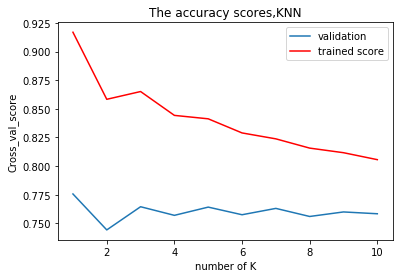

In [30]:
ax = plt.subplot(111)
plt.plot(range(1,11),score,label='validation')
plt.plot(range(1,11),score_trained,color='red',label='trained score')
plt.xlabel("number of K")
plt.legend()
plt.ylabel('Cross_val_score')
plt.title('The accuracy scores,KNN')
#over 10% difference, what it tells?  a poor model? overfitting?

### Performing 10-fold cross validation

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection


# empty list that will hold cv scores
cv_scores = []


for k in range(20):
    k=k+1
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = model_selection.cross_val_score(knn, XX, y, cv=10,scoring='accuracy' )
    
    cv_scores.append(scores.mean())
    print('cross_val_score: ' , k , 'is:', scores.mean())

/Users/niloofarzarifi/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


('cross_val_score: ', 1, 'is:', 0.79498820354806432)
('cross_val_score: ', 2, 'is:', 0.76411179814429198)
('cross_val_score: ', 3, 'is:', 0.78474309898128669)
('cross_val_score: ', 4, 'is:', 0.77809736547693009)
('cross_val_score: ', 5, 'is:', 0.78753245966314467)
('cross_val_score: ', 6, 'is:', 0.7781191184006474)
('cross_val_score: ', 7, 'is:', 0.77938520385659915)
('cross_val_score: ', 8, 'is:', 0.7744198329760914)
('cross_val_score: ', 9, 'is:', 0.77633807674992128)
('cross_val_score: ', 10, 'is:', 0.77267945073838729)
('cross_val_score: ', 11, 'is:', 0.77394516124268586)
('cross_val_score: ', 12, 'is:', 0.76951475970504124)
('cross_val_score: ', 13, 'is:', 0.77115641747133301)
('cross_val_score: ', 14, 'is:', 0.76791266712697503)
('cross_val_score: ', 15, 'is:', 0.76840741841378646)
('cross_val_score: ', 16, 'is:', 0.76609377684595548)
('cross_val_score: ', 17, 'is:', 0.76674636167000898)
('cross_val_score: ', 18, 'is:', 0.76561894039373946)
('cross_val_score: ', 19, 'is:', 0.7657

Text(0.5,1,'Mean of Cross validation scores with cv=10')

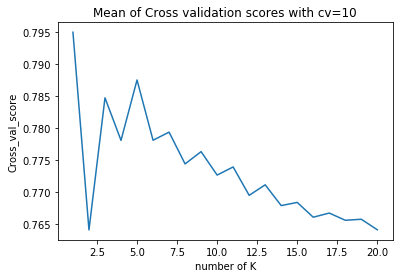

In [32]:
plt.plot(range(1,21),cv_scores)

plt.xlabel("number of K")
plt.ylabel('Cross_val_score')
plt.title('Mean of Cross validation scores with cv=10')
#with 70% of data trained, we have overfitting issue 


### Changing to misclassification error

The optimal number of neighbors is 0


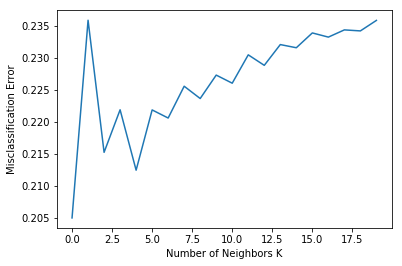

In [33]:
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = range(20)[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(range(20), MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [42]:

#import parfit.parfit as pf
#https://towardsdatascience.com/how-to-make-sgd-classifier-perform-as-well-as-logistic-regression-using-parfit-cc10bca2d3c4
    
    

In [66]:
import plotly.plotly as py
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly

In [67]:
#Handling Character Data for Machine Learning (encoding)
#https://dzone.com/articles/handling-character-data-for-machine-learning